In [1]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
from datetime import datetime as dt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
import squarify
import altair as alt
import seaborn as sns



from fbprophet import Prophet
import pandas as pd,gc
from sklearn import base
color =sns.color_palette()
sns.set_style('darkgrid')

import matplotlib.pylab as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings(action='once')

In [2]:
train = pd.read_csv(r'C:\Users\aadegunle\OneDrive - axamansard.com\Zindi_pro\Untitled Folder\train.csv');train.head()

Rescue_ID Date_TimeCaught     Researcher    CaptureSite ForagingGround  \
0  2000_RE_0060      2000-12-22  Researcher_25  CaptureSite_0          Ocean   
1  2001_RE_0187      2001-10-28   Researcher_6  CaptureSite_0          Ocean   
2  2001_RE_0197      2001-11-01   Researcher_6  CaptureSite_0          Ocean   
3  2002_RE_0031      2002-03-11  Researcher_32  CaptureSite_0          Ocean   
4  2002_RE_0118      2002-08-08  Researcher_25  CaptureSite_0          Ocean   

  CaptureMethod       Fisher                        LandingSite    Species  \
0           Net  Fisher_1072  LandingSite_CaptureSiteCategory_2  Species_6   
1           Net   Fisher_520  LandingSite_CaptureSiteCategory_2  Species_6   
2           Net  Fisher_1669  LandingSite_CaptureSiteCategory_2  Species_5   
3           Net  Fisher_1798  LandingSite_CaptureSiteCategory_2  Species_6   
4       Beached  Fisher_1918  LandingSite_CaptureSiteCategory_2  Species_5   

            Tag_1 Tag_2 Lost_Tags T_Number  CCL_cm  CCW_cm  Weight_Kg  \
0         CC00147  None       NaN      NaN   64.70   62.60        NaN   
1            W442  None       NaN      NaN   35.85   31.35        NaN   
2          KE0376  None       NaN      NaN   51.80   49.20        NaN   
3         CC00302  None       NaN      NaN   60.50   59.00        NaN   
4  NotTagged_0113  None       NaN      NaN   34.70   33.00        NaN   

       Sex                              TurtleCharacteristics    Status  \
0  Unknown                             algae at rear of shell  Released   
1  Unknown  multiple b's on front flippers&  a lot of alga...  Released   
2  Unknown                                              clean  Released   
3  Unknown  1 b 3 CS+ calcerous algae at rear end of shell...  Released   
4  Unknown  very lively+ right eye is hanging out + swolle...  Released   

      ReleaseSite Date_TimeRelease  
0  ReleaseSite_50         22/12/00  
1  ReleaseSite_62         28/10/01  
2  ReleaseSite_50         01/11/01  
3  ReleaseSite_50         11/03/02  
4  ReleaseSite_62         08/08/02

In [3]:
train['Researcher'].value_counts()

Researcher_20    9778
Researcher_30    5346
Researcher_7     1011
Researcher_25     515
Researcher_10     347
Researcher_32     339
Researcher_13     337
Researcher_6      131
Researcher_37      41
Researcher_4       36
Researcher_17      35
Researcher_3       33
Researcher_11      19
Researcher_9       18
Researcher_1       15
Researcher_22      11
Researcher_31       9
Researcher_19       8
Researcher_21       5
Researcher_35       4
Researcher_0        4
Researcher_12       3
Researcher_2        2
Researcher_27       2
Researcher_26       2
Researcher_24       2
Researcher_28       1
Researcher_34       1
Researcher_36       1
Researcher_8        1
Researcher_14       1
Researcher_5        1
Researcher_23       1
Researcher_18       1
Researcher_16       1
Name: Researcher, dtype: int64

In [4]:
sample_sub=pd.read_csv(r'C:\Users\aadegunle\OneDrive - axamansard.com\Zindi_pro\Untitled Folder\Sample_sub.csv')

In [5]:
train.columns

Index(['Rescue_ID', 'Date_TimeCaught', 'Researcher', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'Fisher', 'LandingSite', 'Species',
       'Tag_1', 'Tag_2', 'Lost_Tags', 'T_Number', 'CCL_cm', 'CCW_cm',
       'Weight_Kg', 'Sex', 'TurtleCharacteristics', 'Status', 'ReleaseSite',
       'Date_TimeRelease'],
      dtype='object')

In [6]:
categ = pd.read_csv(r'C:\Users\aadegunle\OneDrive - axamansard.com\Zindi_pro\Untitled Folder\CaptureSite_category.csv')

In [7]:
df = pd.merge(categ, train, on='CaptureSite', right_index=True)
df.head()

CaptureSite    CaptureSiteCategory    Type     Rescue_ID Date_TimeCaught  \
0  CaptureSite_0  CaptureSiteCategory_2  Type_1  2000_RE_0060      2000-12-22   
0  CaptureSite_0  CaptureSiteCategory_2  Type_1  2001_RE_0187      2001-10-28   
0  CaptureSite_0  CaptureSiteCategory_2  Type_1  2001_RE_0197      2001-11-01   
0  CaptureSite_0  CaptureSiteCategory_2  Type_1  2002_RE_0031      2002-03-11   
0  CaptureSite_0  CaptureSiteCategory_2  Type_1  2002_RE_0118      2002-08-08   

      Researcher ForagingGround CaptureMethod       Fisher  \
0  Researcher_25          Ocean           Net  Fisher_1072   
0   Researcher_6          Ocean           Net   Fisher_520   
0   Researcher_6          Ocean           Net  Fisher_1669   
0  Researcher_32          Ocean           Net  Fisher_1798   
0  Researcher_25          Ocean       Beached  Fisher_1918   

                         LandingSite    Species           Tag_1 Tag_2  \
0  LandingSite_CaptureSiteCategory_2  Species_6         CC00147  None   
0  LandingSite_CaptureSiteCategory_2  Species_6            W442  None   
0  LandingSite_CaptureSiteCategory_2  Species_5          KE0376  None   
0  LandingSite_CaptureSiteCategory_2  Species_6         CC00302  None   
0  LandingSite_CaptureSiteCategory_2  Species_5  NotTagged_0113  None   

  Lost_Tags T_Number  CCL_cm  CCW_cm  Weight_Kg      Sex  \
0       NaN      NaN   64.70   62.60        NaN  Unknown   
0       NaN      NaN   35.85   31.35        NaN  Unknown   
0       NaN      NaN   51.80   49.20        NaN  Unknown   
0       NaN      NaN   60.50   59.00        NaN  Unknown   
0       NaN      NaN   34.70   33.00        NaN  Unknown   

                               TurtleCharacteristics    Status  \
0                             algae at rear of shell  Released   
0  multiple b's on front flippers&  a lot of alga...  Released   
0                                              clean  Released   
0  1 b 3 CS+ calcerous algae at rear end of shell...  Released   
0  very lively+ right eye is hanging out + swolle...  Released   

      ReleaseSite Date_TimeRelease  
0  ReleaseSite_50         22/12/00  
0  ReleaseSite_62         28/10/01  
0  ReleaseSite_50         01/11/01  
0  ReleaseSite_50         11/03/02  
0  ReleaseSite_62         08/08/02

In [8]:

df.loc[df['ForagingGround']=='creek', 'ForagingGround']='Creek'

In [9]:
df['Date_TimeCaught'] = pd.to_datetime(df['Date_TimeCaught'], format='%Y-%m-%d')

In [10]:
#categorical and numerical columns into variables
num_col = df.select_dtypes(include=np.number).columns
cat_col = df.select_dtypes(exclude=np.number).columns

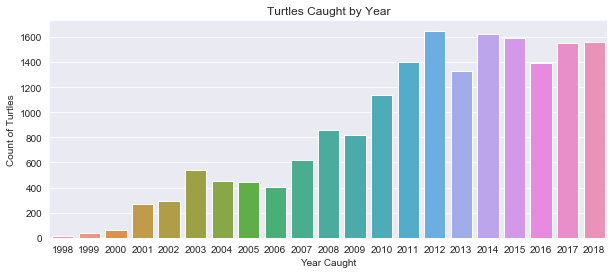

In [11]:
yearly = df['Date_TimeCaught'].dt.year.value_counts().sort_index()

plt.figure(figsize = (10, 4))
ax = sns.barplot(yearly.index, yearly.values)
bars = ax.patches
values = yearly.values

for b, v in zip(bars, values):
    h = b.get_height()
    w = b.get_width()
    x_loc = b.get_x()
    
ax.set_ylabel("Count of Turtles")
ax.set_xlabel("Year Caught")
ax.set_title("Turtles Caught by Year")
plt.show()

In [12]:
df['month_caught'] = df['Date_TimeCaught'].dt.month

In [13]:
df['year_caught'] = df['Date_TimeCaught'].dt.year

In [14]:
df['week_of_year_caught'] = df['Date_TimeCaught'].dt.week

In [15]:
df['day_caught'] = df['Date_TimeCaught'].dt.day

In [16]:
df['day_of_week_caught'] = pd.DatetimeIndex(df['Date_TimeCaught']).dayofweek

In [17]:
df["year_woy"]=df.year_caught*100+df.week_of_year_caught

In [18]:

df['day_of_year']= pd.DatetimeIndex(df['Date_TimeCaught']).dayofyear

In [19]:
df['hour'] = df['Date_TimeCaught'].dt.hour

In [20]:
df.reset_index(drop=True, inplace=True)


In [21]:
df.isnull().sum().sort_values(ascending=False)

T_Number                 18024
Lost_Tags                17137
Date_TimeRelease          6108
Weight_Kg                 5409
Sex                       4330
Status                    3633
ReleaseSite                 75
TurtleCharacteristics       41
CCW_cm                      27
CCL_cm                      24
Species                      0
ForagingGround               0
Researcher                   0
Date_TimeCaught              0
Rescue_ID                    0
CaptureMethod                0
Type                         0
CaptureSiteCategory          0
Fisher                       0
LandingSite                  0
hour                         0
Tag_1                        0
Tag_2                        0
day_of_year                  0
month_caught                 0
year_caught                  0
week_of_year_caught          0
day_caught                   0
day_of_week_caught           0
year_woy                     0
CaptureSite                  0
dtype: int64

In [22]:
del df['T_Number']
del df['Lost_Tags']

In [23]:
df['Weight_Kg'].fillna((df['Weight_Kg'].median()), inplace=True)

In [24]:
df.groupby(by = df['CaptureSite']).median()

CCL_cm  CCW_cm  Weight_Kg  month_caught  year_caught  \
CaptureSite                                                            
CaptureSite_0   39.900  38.200      7.500           8.0       2014.0   
CaptureSite_1   39.000  36.500      7.130           7.0       2013.0   
CaptureSite_10  38.000  35.700      7.345           6.0       2016.0   
CaptureSite_11  41.600  40.135      7.500           7.0       2009.0   
CaptureSite_12  39.700  37.950      7.500           7.0       2010.0   
CaptureSite_13  39.400  37.600      7.500           8.0       2014.0   
CaptureSite_14  41.400  39.200      7.500           6.0       2013.0   
CaptureSite_15  36.500  34.000      5.785           7.0       2015.0   
CaptureSite_16  42.600  40.700      7.500           8.0       2011.0   
CaptureSite_17  36.900  34.300      5.800           8.0       2014.0   
CaptureSite_18  42.200  41.700      7.500           7.0       2009.0   
CaptureSite_19  39.600  37.735      7.500           9.0       2014.0   
CaptureSite_2   39.050  36.500      7.500           6.0       2011.0   
CaptureSite_20  47.500  43.300     11.680           5.0       2013.0   
CaptureSite_21  46.400  43.300      7.975           6.0       2012.0   
CaptureSite_22  37.415  35.000      6.025           7.0       2015.0   
CaptureSite_23  44.100  41.975      7.500           7.0       2010.0   
CaptureSite_24  37.700  35.300      7.060           7.0       2015.0   
CaptureSite_25  43.500  41.500      7.500           8.0       2010.0   
CaptureSite_26  41.700  39.700      7.500           8.0       2011.0   
CaptureSite_27  44.300  42.000      7.500           6.0       2011.0   
CaptureSite_28  37.100  34.900      7.500           8.0       2012.0   
CaptureSite_3   37.470  35.100      6.220          10.0       2018.0   
CaptureSite_4   39.450  37.950      7.500           9.0       2013.0   
CaptureSite_5   44.500  41.850      7.500           6.0       2010.0   
CaptureSite_6   38.550  35.885      6.760           6.5       2015.0   
CaptureSite_7   46.950  43.550      7.500           6.0       2009.0   
CaptureSite_8   40.450  37.200      7.500           9.0       2012.0   
CaptureSite_9   39.200  36.500      7.500           7.0       2014.0   

                week_of_year_caught  day_caught  day_of_week_caught  year_woy  \
CaptureSite                                                                     
CaptureSite_0                  35.0        16.0                 2.0  201430.0   
CaptureSite_1                  30.0        17.0                 3.0  201326.0   
CaptureSite_10                 24.0        15.0                 3.0  201650.5   
CaptureSite_11                 30.0        17.0                 3.0  200914.0   
CaptureSite_12                 31.0        16.0                 3.0  201048.0   
CaptureSite_13                 35.0        15.0                 3.0  201444.0   
CaptureSite_14                 26.0        18.0                 4.0  201313.0   
CaptureSite_15                 28.0        16.0                 3.0  201503.0   
CaptureSite_16                 31.0        16.0                 3.0  201117.0   
CaptureSite_17                 32.0        14.0                 3.0  201428.0   
CaptureSite_18                 31.0        21.0                 2.0  200938.0   
CaptureSite_19                 34.0        14.0                 3.0  201443.0   
CaptureSite_2                  25.0        16.0                 3.0  201112.0   
CaptureSite_20                 22.0        17.0                 3.0  201318.0   
CaptureSite_21                 24.0        15.0                 3.0  201207.0   
CaptureSite_22                 28.0        15.0                 3.0  201505.5   
CaptureSite_23                 30.0        17.0                 3.0  201033.0   
CaptureSite_24                 28.0        16.0                 3.0  201545.0   
CaptureSite_25                 34.0        16.0                 3.0  201047.0   
CaptureSite_26                 33.0        18.0                 3.0  201143.0   
C

In [25]:
df['CCL_cm'] = df['CCL_cm'].fillna(df.groupby(['CaptureSite'])['CCL_cm'].transform('median'))
df['CCW_cm'] = df['CCW_cm'].fillna(df.groupby(['CaptureSite'])['CCW_cm'].transform('median'))

In [26]:
df[['Date_TimeRelease', 'Date_TimeCaught']]

Date_TimeRelease Date_TimeCaught
0                                               22/12/00      2000-12-22
1                                               28/10/01      2001-10-28
2                                               01/11/01      2001-11-01
3                                               11/03/02      2002-03-11
4                                               08/08/02      2002-08-08
5                                               10/08/02      2002-08-10
6                                               21/10/02      2002-10-21
7                                               21/10/02      2002-10-21
8                                               22/10/02      2002-10-22
9                                                    NaN      2003-06-09
10                                        ReleaseSite_50      2003-08-11
11                                                   NaN      2003-09-02
12                                                   NaN      2003-09-22
13                                              Released      2003-09-22
14                                        ReleaseSite_50      2003-09-22
15                                        ReleaseSite_62      2003-09-26
16                                                   NaN      2004-10-16
17                                                   NaN      2008-01-23
18                                                   NaN      2009-01-06
19                                                   NaN      2009-02-09
20                                                   NaN      2009-02-17
21                                                   NaN      2009-06-25
22                                                   NaN      2009-07-19
23                                                   NaN      2009-08-04
24                                                   NaN      2009-08-12
25                                                   NaN      2009-09-23
26                                                   NaN      2010-04-23
27                                                   NaN      2010-09-22
28                                                   NaN      2010-10-02
29                                                   NaN      2010-10-28
30                                                   NaN      2010-10-28
31                                                   NaN      2010-11-03
32                                                   NaN      2010-11-15
33                                                   NaN      2011-06-17
34                                              22/07/11      2011-06-22
35                                                   NaN      2011-08-16
36                                                   NaN      2011-08-28
37                                              22/10/11      2011-10-22
38                                              22/10/11      2011-10-22
39                                              09/01/12      2012-01-09
40                                              26/04/12      2012-04-26
41                                              11/05/12      2012-05-11
42                                              05/06/12      2012-06-05
43                                              21/06/12      2012-06-21
44                                              28/09/12      2012-09-28
45                                              28/05/14      2014-05-28
46                                              15/06/14      2014-06-15
47                                              25/07/14      2014-07-25
48                                              26/08/14      2014-08-26
49                                              14/09/14      2014-09-14
50                                              09/11/14      2014-11-09
51                                              08/12/14      2014-12-08
52                                              23/12/14      2014-12-23
53                                              23/12/14      2014-12-23
54                       

In [27]:
df['Sex'].fillna('Unknown', inplace=True)

In [28]:
df.loc[df['Sex']=='Not_Recorded', 'Sex']='Unknown'


In [29]:

df['Status'].fillna('Not_Recorded', inplace=True)

In [30]:
df['ReleaseSite'].fillna('Unknown', inplace=True)

In [31]:
df['TurtleCharacteristics'].fillna('Unknown', inplace=True)

In [32]:

# split Id to Year woy and CaptureSite
sample_sub["year_woy"]=(sample_sub.ID.apply(lambda x: x.split("_")[-1])).astype(int)
sample_sub["CaptureSite"]=sample_sub.ID.apply(lambda x: ("_").join(x.split("_")[0:-1]))

In [33]:
# Create Time features from Date_TimeCaught 
train["Date_TimeCaught"]=pd.to_datetime(train["Date_TimeCaught"])
print(train.Date_TimeCaught.min(),train.Date_TimeCaught.max())
train["year"]=train.Date_TimeCaught.dt.year
train["week_of_year"]=train.Date_TimeCaught.dt.weekofyear
train["year_woy"]=train.year*100+train.week_of_year

1998-04-17 00:00:00 2018-12-31 00:00:00


In [34]:
keys=pd.concat([train[["year_woy","CaptureSite"]],sample_sub[["year_woy","CaptureSite"]]])
# keys.sort_values(["CaptureSite","year_woy"],inplace=True)
CaptureSite_min_year_woy=keys.groupby("CaptureSite").year_woy.min().rename("year_woy").reset_index()
CaptureSite_min_year_woy.head()

CaptureSite  year_woy
0   CaptureSite_0    200051
1   CaptureSite_1    200123
2  CaptureSite_10    200050
3  CaptureSite_11    199828
4  CaptureSite_12    200107

In [35]:
range_year_woy=pd.DataFrame()
range_year_woy["Date_TimeCaught"]=pd.date_range(start=train.Date_TimeCaught.min(),end=dt(2019,10,31))

In [36]:
range_year_woy["year"]=range_year_woy.Date_TimeCaught.dt.year
range_year_woy["week_of_year"]=range_year_woy.Date_TimeCaught.dt.weekofyear
range_year_woy["year_woy"]=range_year_woy.year*100+range_year_woy.week_of_year
range_year_woy.drop_duplicates(["year_woy"],inplace=True)
range_year_woy

Date_TimeCaught  year  week_of_year  year_woy
0         1998-04-17  1998            16    199816
3         1998-04-20  1998            17    199817
10        1998-04-27  1998            18    199818
17        1998-05-04  1998            19    199819
24        1998-05-11  1998            20    199820
31        1998-05-18  1998            21    199821
38        1998-05-25  1998            22    199822
45        1998-06-01  1998            23    199823
52        1998-06-08  1998            24    199824
59        1998-06-15  1998            25    199825
66        1998-06-22  1998            26    199826
73        1998-06-29  1998            27    199827
80        1998-07-06  1998            28    199828
87        1998-07-13  1998            29    199829
94        1998-07-20  1998            30    199830
101       1998-07-27  1998            31    199831
108       1998-08-03  1998            32    199832
115       1998-08-10  1998            33    199833
122       1998-08-17  1998            34    199834
129       1998-08-24  1998            35    199835
136       1998-08-31  1998            36    199836
143       1998-09-07  1998            37    199837
150       1998-09-14  1998            38    199838
157       1998-09-21  1998            39    199839
164       1998-09-28  1998            40    199840
171       1998-10-05  1998            41    199841
178       1998-10-12  1998            42    199842
185       1998-10-19  1998            43    199843
192       1998-10-26  1998            44    199844
199       1998-11-02  1998            45    199845
206       1998-11-09  1998            46    199846
213       1998-11-16  1998            47    199847
220       1998-11-23  1998            48    199848
227       1998-11-30  1998            49    199849
234       1998-12-07  1998            50    199850
241       1998-12-14  1998            51    199851
248       1998-12-21  1998            52    199852
255       1998-12-28  1998            53    199853
259       1999-01-01  1999            53    199953
262       1999-01-04  1999             1    199901
269       1999-01-11  1999             2    199902
276       1999-01-18  1999             3    199903
283       1999-01-25  1999             4    199904
290       1999-02-01  1999             5    199905
297       1999-02-08  1999             6    199906
304       1999-02-15  1999             7    199907
311       1999-02-22  1999             8    199908
318       1999-03-01  1999             9    199909
325       1999-03-08  1999            10    199910
332       1999-03-15  1999            11    199911
339       1999-03-22  1999            12    199912
346       1999-03-29  1999            13    199913
353       1999-04-05  1999            14    199914
360       1999-04-12  1999            15    199915
367       1999-04-19  1999            16    199916
374       1999-04-26  1999            17    199917
381       1999-05-03  1999            18    199918
388       1999-05-10  1999            19    199919
395       1999-05-17  1999            20    199920
402       1999-05-24  1999            21    199921
409       1999-05-31  1999            22    199922
416       1999-06-07  1999            23    199923
423       1999-06-14  1999            24    199924
430       1999-06-21  1999            25    199925
437       1999-06-28  1999            26    199926
444       1999-07-05  1999            27    199927
451       1999-07-12  1999            28    199928
458       1999-07-19  1999            29    199929
465       1999-07-26  1999            30    199930
472       1999-08-02  1999            31    199931
479       1999-08-09  1999            32    199932
486       1999-08-16  1999            33    199933
493       1999-08-23  1999            34    199934
500       1999-08-30  1999            35    199935
507       1999-09-06  1999            36    199936
514       1999-09-13  1999            37    199937
521       1999-09-20  1999            38    199938
528       1999-09-27  1999 

In [37]:
final_data=[]
for site , year_woy in zip(CaptureSite_min_year_woy.CaptureSite.values,CaptureSite_min_year_woy.year_woy.values) :

    one_site_df=range_year_woy[range_year_woy.year_woy>=year_woy]
    one_site_df["CaptureSite"]=site
    final_data.append(one_site_df)
final_data=pd.concat(final_data)
len(final_data)

C:\Users\aadegunle\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



28048

In [38]:
Target=train.groupby(["year_woy","CaptureSite"]).CaptureSite.count().rename("Capture_Number").reset_index()
final_data=final_data.merge(Target,on=["year_woy","CaptureSite"],how="left")

In [39]:
final_data.Capture_Number.fillna(0,inplace=True)

In [40]:
final_data[(final_data.year==2008)|(final_data.year==2009)].head()

Date_TimeCaught  year  week_of_year  year_woy    CaptureSite  \
368      2008-01-01  2008             1    200801  CaptureSite_0   
369      2008-01-07  2008             2    200802  CaptureSite_0   
370      2008-01-14  2008             3    200803  CaptureSite_0   
371      2008-01-21  2008             4    200804  CaptureSite_0   
372      2008-01-28  2008             5    200805  CaptureSite_0   

     Capture_Number  
368             0.0  
369             0.0  
370             0.0  
371             1.0  
372             0.0

In [41]:
final_data.drop(final_data[(final_data.year==2008)|(final_data.year==2009)].index, inplace=True)

In [42]:
train=final_data[final_data.year<2019]
test=final_data[final_data.year==2019]

In [43]:
train.to_csv("final_data.csv",index=False)
test.to_csv("submission_data.csv",index=False)

In [44]:
del train
del test
del final_data
del Target

In [45]:
#join data
df_date = pd.read_csv('final_data.csv')
df_date.head()

Date_TimeCaught  year  week_of_year  year_woy    CaptureSite  Capture_Number
0      2000-01-01  2000            52    200052  CaptureSite_0             0.0
1      2000-12-18  2000            51    200051  CaptureSite_0             1.0
2      2001-01-01  2001             1    200101  CaptureSite_0             0.0
3      2001-01-08  2001             2    200102  CaptureSite_0             0.0
4      2001-01-15  2001             3    200103  CaptureSite_0             0.0

In [46]:
df_sub = pd.read_csv('submission_data.csv')
df_sub.head()

Date_TimeCaught  year  week_of_year  year_woy    CaptureSite  Capture_Number
0      2019-01-01  2019             1    201901  CaptureSite_0             0.0
1      2019-01-07  2019             2    201902  CaptureSite_0             0.0
2      2019-01-14  2019             3    201903  CaptureSite_0             0.0
3      2019-01-21  2019             4    201904  CaptureSite_0             0.0
4      2019-01-28  2019             5    201905  CaptureSite_0             0.0

In [47]:
df_date['Date_TimeCaught'] = pd.to_datetime(df_date['Date_TimeCaught'], format='%Y-%m-%d')
df_sub['Date_TimeCaught'] = pd.to_datetime(df_sub['Date_TimeCaught'], format='%Y-%m-%d')

In [48]:
df_date['day_of_year']= pd.DatetimeIndex(df_date['Date_TimeCaught']).dayofyear
df_sub['day_of_year']= pd.DatetimeIndex(df_sub['Date_TimeCaught']).dayofyear
df_date['month'] = df_date['Date_TimeCaught'].dt.month
df_sub['month'] = df_sub['Date_TimeCaught'].dt.month
df_date['day_of_week_caught'] = pd.DatetimeIndex(df_date['Date_TimeCaught']).dayofweek
df_sub['day_of_week_caught'] = pd.DatetimeIndex(df_sub['Date_TimeCaught']).dayofweek

In [49]:
#new features
df_date['is_weekend'] = df_date.day_of_week_caught.isin([5,6])*1
df_date['hour'] = df_date['Date_TimeCaught'].dt.hour
df_date['quarter'] = df_date['Date_TimeCaught'].dt.quarter
df_date["is_month_start"]=df_date["Date_TimeCaught"].dt.is_month_start
df_date["is_year_end"]=df_date["Date_TimeCaught"].dt.is_year_end
df_date["is_year_start"]=df_date["Date_TimeCaught"].dt.is_year_start
df_date["is_month_end"]=df_date["Date_TimeCaught"].dt.is_month_end
df_date["is_q_start"]=df_date["Date_TimeCaught"].dt.is_quarter_start
df_date["is_q_end"]=df_date["Date_TimeCaught"].dt.is_quarter_end

In [50]:
#new features
df_sub['is_weekend'] = df_sub.day_of_week_caught.isin([5,6])*1
df_sub['hour'] = df_sub['Date_TimeCaught'].dt.hour
df_sub['quarter'] = df_sub['Date_TimeCaught'].dt.quarter
df_sub["is_month_start"]=df_sub["Date_TimeCaught"].dt.is_month_start
df_sub["is_year_end"]=df_sub["Date_TimeCaught"].dt.is_year_end
df_sub["is_year_start"]=df_sub["Date_TimeCaught"].dt.is_year_start
df_sub["is_month_end"]=df_sub["Date_TimeCaught"].dt.is_month_end
df_sub["is_q_start"]=df_sub["Date_TimeCaught"].dt.is_quarter_start
df_sub["is_q_end"]=df_sub["Date_TimeCaught"].dt.is_quarter_end

In [51]:
df_date['day_of_month'] = pd.DatetimeIndex(df_date['Date_TimeCaught']).day
df_sub['day_of_month'] = pd.DatetimeIndex(df_sub['Date_TimeCaught']).day

In [52]:

df_date = pd.merge(categ, df_date, on='CaptureSite', right_index=True)
df_date.head()

CaptureSite    CaptureSiteCategory    Type Date_TimeCaught  year  \
0  CaptureSite_0  CaptureSiteCategory_2  Type_1      2000-01-01  2000   
0  CaptureSite_0  CaptureSiteCategory_2  Type_1      2000-12-18  2000   
0  CaptureSite_0  CaptureSiteCategory_2  Type_1      2001-01-01  2001   
0  CaptureSite_0  CaptureSiteCategory_2  Type_1      2001-01-08  2001   
0  CaptureSite_0  CaptureSiteCategory_2  Type_1      2001-01-15  2001   

   week_of_year  year_woy  Capture_Number  day_of_year  month  \
0            52    200052             0.0            1      1   
0            51    200051             1.0          353     12   
0             1    200101             0.0            1      1   
0             2    200102             0.0            8      1   
0             3    200103             0.0           15      1   

   day_of_week_caught  is_weekend  hour  quarter  is_month_start  is_year_end  \
0                   5           1     0        1            True        False   
0                   0           0     0        4           False        False   
0                   0           0     0        1            True        False   
0                   0           0     0        1           False        False   
0                   0           0     0        1           False        False   

   is_year_start  is_month_end  is_q_start  is_q_end  day_of_month  
0           True         False        True     False             1  
0          False         False       False     False            18  
0           True         False        True     False             1  
0          False         False       False     False             8  
0          False         False       False     False            15

In [53]:
df_sub = pd.merge(categ, df_sub, on='CaptureSite', right_index=True)
df_sub.head()

CaptureSite    CaptureSiteCategory    Type Date_TimeCaught  year  \
0  CaptureSite_0  CaptureSiteCategory_2  Type_1      2019-01-01  2019   
0  CaptureSite_0  CaptureSiteCategory_2  Type_1      2019-01-07  2019   
0  CaptureSite_0  CaptureSiteCategory_2  Type_1      2019-01-14  2019   
0  CaptureSite_0  CaptureSiteCategory_2  Type_1      2019-01-21  2019   
0  CaptureSite_0  CaptureSiteCategory_2  Type_1      2019-01-28  2019   

   week_of_year  year_woy  Capture_Number  day_of_year  month  \
0             1    201901             0.0            1      1   
0             2    201902             0.0            7      1   
0             3    201903             0.0           14      1   
0             4    201904             0.0           21      1   
0             5    201905             0.0           28      1   

   day_of_week_caught  is_weekend  hour  quarter  is_month_start  is_year_end  \
0                   1           0     0        1            True        False   
0                   0           0     0        1           False        False   
0                   0           0     0        1           False        False   
0                   0           0     0        1           False        False   
0                   0           0     0        1           False        False   

   is_year_start  is_month_end  is_q_start  is_q_end  day_of_month  
0           True         False        True     False             1  
0          False         False       False     False             7  
0          False         False       False     False            14  
0          False         False       False     False            21  
0          False         False       False     False            28

In [54]:

# transform those categories and types to numerical values

df_date["CaptureSiteCategory"] = df_date["CaptureSiteCategory"].str.split(pat = "_", expand=True)[1]
df_date["Type"] = df_date["Type"].str.split(pat = "_", expand=True)[1]
df_sub["CaptureSiteCategory"] = df_sub["CaptureSiteCategory"].str.split(pat = "_", expand=True)[1]
df_sub["Type"] = df_sub["Type"].str.split(pat = "_", expand=True)[1]

In [55]:
df_date["CaptureSite_id"] = df_date["CaptureSite"].str.split(pat = "_", expand=True)[1]

In [56]:
df_sub["CaptureSite_id"] = df_sub["CaptureSite"].str.split(pat = "_", expand=True)[1]

In [57]:
df_sub.head()

CaptureSite CaptureSiteCategory Type Date_TimeCaught  year  week_of_year  \
0  CaptureSite_0                   2    1      2019-01-01  2019             1   
0  CaptureSite_0                   2    1      2019-01-07  2019             2   
0  CaptureSite_0                   2    1      2019-01-14  2019             3   
0  CaptureSite_0                   2    1      2019-01-21  2019             4   
0  CaptureSite_0                   2    1      2019-01-28  2019             5   

   year_woy  Capture_Number  day_of_year  month  day_of_week_caught  \
0    201901             0.0            1      1                   1   
0    201902             0.0            7      1                   0   
0    201903             0.0           14      1                   0   
0    201904             0.0           21      1                   0   
0    201905             0.0           28      1                   0   

   is_weekend  hour  quarter  is_month_start  is_year_end  is_year_start  \
0           0     0        1            True        False           True   
0           0     0        1           False        False          False   
0           0     0        1           False        False          False   
0           0     0        1           False        False          False   
0           0     0        1           False        False          False   

   is_month_end  is_q_start  is_q_end  day_of_month CaptureSite_id  
0         False        True     False             1              0  
0         False       False     False             7              0  
0         False       False     False            14              0  
0         False       False     False            21              0  
0         False       False     False            28              0

Text(0.5, 0, 'number of captures')

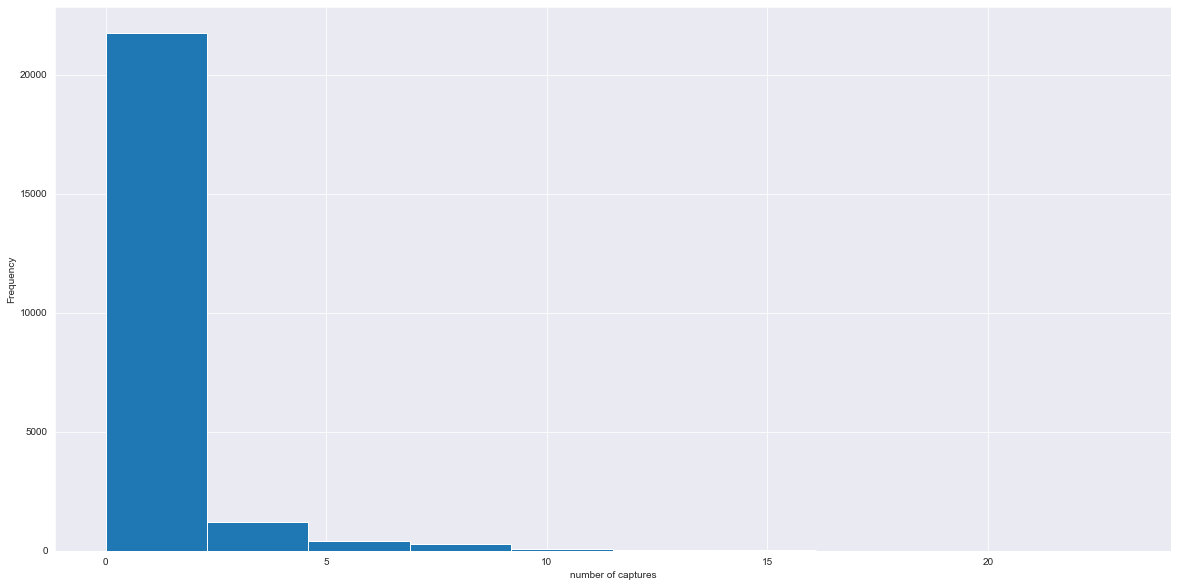

In [58]:

#Let's take a look at how capture numbers vary
ax = df_date['Capture_Number'].plot(kind='hist')
plt.xlabel('number of captures')

In [59]:
df_date.corr()['Capture_Number'].sort_values(ascending=False)

Capture_Number        1.000000
year_woy              0.201067
year                  0.199772
day_of_year           0.047706
month                 0.047695
quarter               0.046984
week_of_year          0.044185
is_q_end              0.000983
day_of_month         -0.000129
is_month_end         -0.000696
is_weekend           -0.002348
day_of_week_caught   -0.010001
is_year_start        -0.010930
is_month_start       -0.014901
is_q_start           -0.014950
hour                       NaN
is_year_end                NaN
Name: Capture_Number, dtype: float64

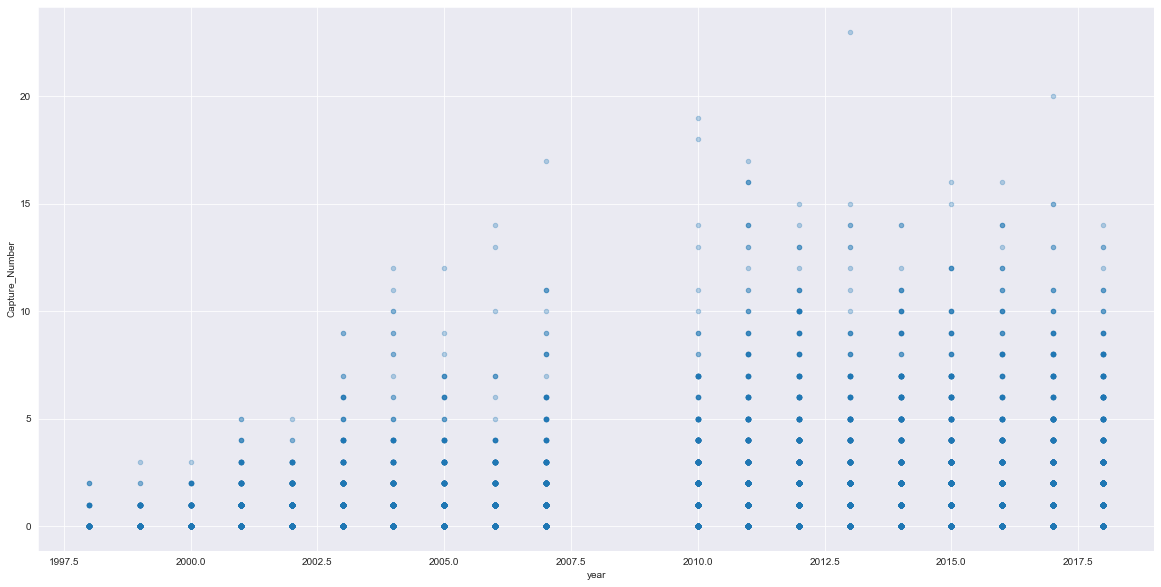

In [60]:
df_date.plot(x='year', y='Capture_Number', kind='scatter', alpha=0.3)

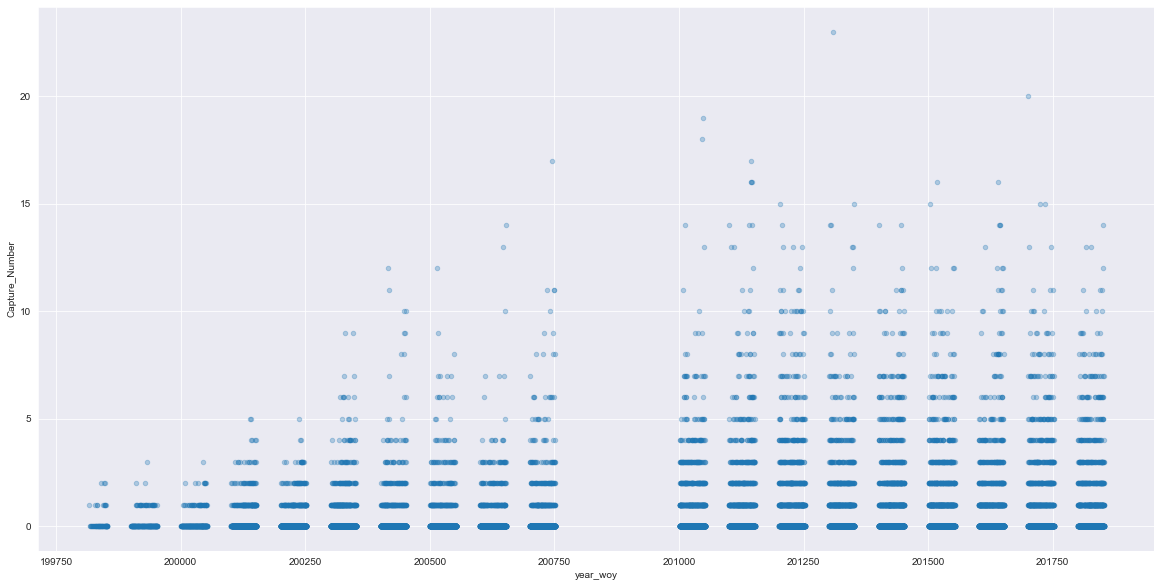

In [61]:
df_date.plot(x='year_woy', y='Capture_Number', kind='scatter', alpha=0.3)

In [62]:
df_date.columns

Index(['CaptureSite', 'CaptureSiteCategory', 'Type', 'Date_TimeCaught', 'year',
       'week_of_year', 'year_woy', 'Capture_Number', 'day_of_year', 'month',
       'day_of_week_caught', 'is_weekend', 'hour', 'quarter', 'is_month_start',
       'is_year_end', 'is_year_start', 'is_month_end', 'is_q_start',
       'is_q_end', 'day_of_month', 'CaptureSite_id'],
      dtype='object')

In [63]:
in_cols = df_date.drop(['Capture_Number','Date_TimeCaught', 'CaptureSite', 'is_q_start', 'is_q_end', 'is_year_end', 'is_year_start'], axis=1).columns
in_cols

Index(['CaptureSiteCategory', 'Type', 'year', 'week_of_year', 'year_woy',
       'day_of_year', 'month', 'day_of_week_caught', 'is_weekend', 'hour',
       'quarter', 'is_month_start', 'is_month_end', 'day_of_month',
       'CaptureSite_id'],
      dtype='object')

In [64]:
in_cols

Index(['CaptureSiteCategory', 'Type', 'year', 'week_of_year', 'year_woy',
       'day_of_year', 'month', 'day_of_week_caught', 'is_weekend', 'hour',
       'quarter', 'is_month_start', 'is_month_end', 'day_of_month',
       'CaptureSite_id'],
      dtype='object')

In [65]:

ycol = 'Capture_Number'

In [69]:
from catboost import CatBoostRegressor

C:\Users\aadegunle\AppData\Local\Continuum\anaconda3\lib\imp.py:342: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working



In [70]:
in_cols

Index(['CaptureSiteCategory', 'Type', 'year', 'week_of_year', 'year_woy',
       'day_of_year', 'month', 'day_of_week_caught', 'is_weekend', 'hour',
       'quarter', 'is_month_start', 'is_month_end', 'day_of_month',
       'CaptureSite_id'],
      dtype='object')

In [71]:
x =df_date[in_cols]
y=df_date[ycol]

In [72]:
x.head()

CaptureSiteCategory Type  year  week_of_year  year_woy  day_of_year  month  \
0                   2    1  2000            52    200052            1      1   
0                   2    1  2000            51    200051          353     12   
0                   2    1  2001             1    200101            1      1   
0                   2    1  2001             2    200102            8      1   
0                   2    1  2001             3    200103           15      1   

   day_of_week_caught  is_weekend  hour  quarter  is_month_start  \
0                   5           1     0        1            True   
0                   0           0     0        4           False   
0                   0           0     0        1            True   
0                   0           0     0        1           False   
0                   0           0     0        1           False   

   is_month_end  day_of_month CaptureSite_id  
0         False             1              0  
0         False            18              0  
0         False             1              0  
0         False             8              0  
0         False            15              0

In [73]:
from catboost import CatBoostRegressor
import catboost
rf = CatBoostRegressor(iterations=800,
                              learning_rate=0.03,
                              depth=4,
                             bootstrap_type='Bernoulli',
                              subsample=0.7,
                              random_seed=99,
                              allow_writing_files=False)

In [74]:
rf.fit(df_date[in_cols], df_date[ycol])

0:	learn: 1.6983464	total: 69.5ms	remaining: 55.5s
1:	learn: 1.6822333	total: 89.8ms	remaining: 35.8s
2:	learn: 1.6662347	total: 102ms	remaining: 27s
3:	learn: 1.6517051	total: 114ms	remaining: 22.7s
4:	learn: 1.6391983	total: 128ms	remaining: 20.4s
5:	learn: 1.6260178	total: 140ms	remaining: 18.6s
6:	learn: 1.6145470	total: 152ms	remaining: 17.3s
7:	learn: 1.6023725	total: 165ms	remaining: 16.3s
8:	learn: 1.5935125	total: 177ms	remaining: 15.5s
9:	learn: 1.5843550	total: 190ms	remaining: 15s
10:	learn: 1.5741812	total: 202ms	remaining: 14.5s
11:	learn: 1.5640346	total: 215ms	remaining: 14.1s
12:	learn: 1.5564699	total: 228ms	remaining: 13.8s
13:	learn: 1.5481431	total: 240ms	remaining: 13.5s
14:	learn: 1.5384842	total: 252ms	remaining: 13.2s
15:	learn: 1.5300551	total: 267ms	remaining: 13.1s
16:	learn: 1.5214192	total: 283ms	remaining: 13s
17:	learn: 1.5142788	total: 297ms	remaining: 12.9s
18:	learn: 1.5064375	total: 309ms	remaining: 12.7s
19:	learn: 1.4995799	total: 322ms	remaining: 

167:	learn: 1.2714758	total: 2.48s	remaining: 9.33s
168:	learn: 1.2713343	total: 2.49s	remaining: 9.3s
169:	learn: 1.2704880	total: 2.51s	remaining: 9.3s
170:	learn: 1.2700841	total: 2.52s	remaining: 9.28s
171:	learn: 1.2699063	total: 2.54s	remaining: 9.27s
172:	learn: 1.2697847	total: 2.55s	remaining: 9.24s
173:	learn: 1.2694125	total: 2.56s	remaining: 9.22s
174:	learn: 1.2689277	total: 2.58s	remaining: 9.2s
175:	learn: 1.2683065	total: 2.59s	remaining: 9.17s
176:	learn: 1.2677865	total: 2.6s	remaining: 9.15s
177:	learn: 1.2674080	total: 2.61s	remaining: 9.12s
178:	learn: 1.2670426	total: 2.62s	remaining: 9.1s
179:	learn: 1.2662563	total: 2.63s	remaining: 9.08s
180:	learn: 1.2656929	total: 2.65s	remaining: 9.05s
181:	learn: 1.2655958	total: 2.67s	remaining: 9.05s
182:	learn: 1.2647797	total: 2.68s	remaining: 9.03s
183:	learn: 1.2646447	total: 2.69s	remaining: 9s
184:	learn: 1.2642309	total: 2.7s	remaining: 8.99s
185:	learn: 1.2639152	total: 2.71s	remaining: 8.96s
186:	learn: 1.2636576

328:	learn: 1.2300342	total: 4.7s	remaining: 6.73s
329:	learn: 1.2298701	total: 4.72s	remaining: 6.73s
330:	learn: 1.2293571	total: 4.74s	remaining: 6.72s
331:	learn: 1.2291279	total: 4.75s	remaining: 6.7s
332:	learn: 1.2290175	total: 4.77s	remaining: 6.69s
333:	learn: 1.2288752	total: 4.78s	remaining: 6.67s
334:	learn: 1.2287635	total: 4.79s	remaining: 6.65s
335:	learn: 1.2286860	total: 4.8s	remaining: 6.64s
336:	learn: 1.2285485	total: 4.82s	remaining: 6.62s
337:	learn: 1.2280989	total: 4.83s	remaining: 6.6s
338:	learn: 1.2279118	total: 4.84s	remaining: 6.58s
339:	learn: 1.2275488	total: 4.85s	remaining: 6.57s
340:	learn: 1.2273838	total: 4.87s	remaining: 6.55s
341:	learn: 1.2270643	total: 4.88s	remaining: 6.54s
342:	learn: 1.2268838	total: 4.9s	remaining: 6.53s
343:	learn: 1.2268402	total: 4.91s	remaining: 6.51s
344:	learn: 1.2264874	total: 4.93s	remaining: 6.5s
345:	learn: 1.2263648	total: 4.94s	remaining: 6.48s
346:	learn: 1.2262869	total: 4.95s	remaining: 6.46s
347:	learn: 1.2260

496:	learn: 1.2068949	total: 6.91s	remaining: 4.21s
497:	learn: 1.2068077	total: 6.92s	remaining: 4.2s
498:	learn: 1.2067361	total: 6.94s	remaining: 4.18s
499:	learn: 1.2064657	total: 6.95s	remaining: 4.17s
500:	learn: 1.2062308	total: 6.96s	remaining: 4.15s
501:	learn: 1.2060960	total: 6.97s	remaining: 4.14s
502:	learn: 1.2060673	total: 6.98s	remaining: 4.12s
503:	learn: 1.2060100	total: 7s	remaining: 4.11s
504:	learn: 1.2057492	total: 7.01s	remaining: 4.09s
505:	learn: 1.2055819	total: 7.02s	remaining: 4.08s
506:	learn: 1.2055377	total: 7.03s	remaining: 4.06s
507:	learn: 1.2054350	total: 7.04s	remaining: 4.05s
508:	learn: 1.2053040	total: 7.05s	remaining: 4.03s
509:	learn: 1.2050616	total: 7.07s	remaining: 4.02s
510:	learn: 1.2049565	total: 7.08s	remaining: 4s
511:	learn: 1.2049243	total: 7.09s	remaining: 3.99s
512:	learn: 1.2048517	total: 7.11s	remaining: 3.98s
513:	learn: 1.2048117	total: 7.12s	remaining: 3.96s
514:	learn: 1.2047212	total: 7.13s	remaining: 3.95s
515:	learn: 1.20456

657:	learn: 1.1933674	total: 8.93s	remaining: 1.93s
658:	learn: 1.1933252	total: 8.94s	remaining: 1.91s
659:	learn: 1.1932947	total: 8.96s	remaining: 1.9s
660:	learn: 1.1929665	total: 8.97s	remaining: 1.89s
661:	learn: 1.1929126	total: 8.99s	remaining: 1.87s
662:	learn: 1.1928869	total: 9s	remaining: 1.86s
663:	learn: 1.1928739	total: 9.01s	remaining: 1.84s
664:	learn: 1.1927481	total: 9.02s	remaining: 1.83s
665:	learn: 1.1927132	total: 9.04s	remaining: 1.82s
666:	learn: 1.1926937	total: 9.05s	remaining: 1.8s
667:	learn: 1.1925386	total: 9.06s	remaining: 1.79s
668:	learn: 1.1924709	total: 9.07s	remaining: 1.78s
669:	learn: 1.1924290	total: 9.08s	remaining: 1.76s
670:	learn: 1.1924122	total: 9.09s	remaining: 1.75s
671:	learn: 1.1923780	total: 9.11s	remaining: 1.74s
672:	learn: 1.1923296	total: 9.12s	remaining: 1.72s
673:	learn: 1.1921520	total: 9.14s	remaining: 1.71s
674:	learn: 1.1920906	total: 9.15s	remaining: 1.69s
675:	learn: 1.1920486	total: 9.16s	remaining: 1.68s
676:	learn: 1.192

Text(0, 0.5, 'Predicted Value')

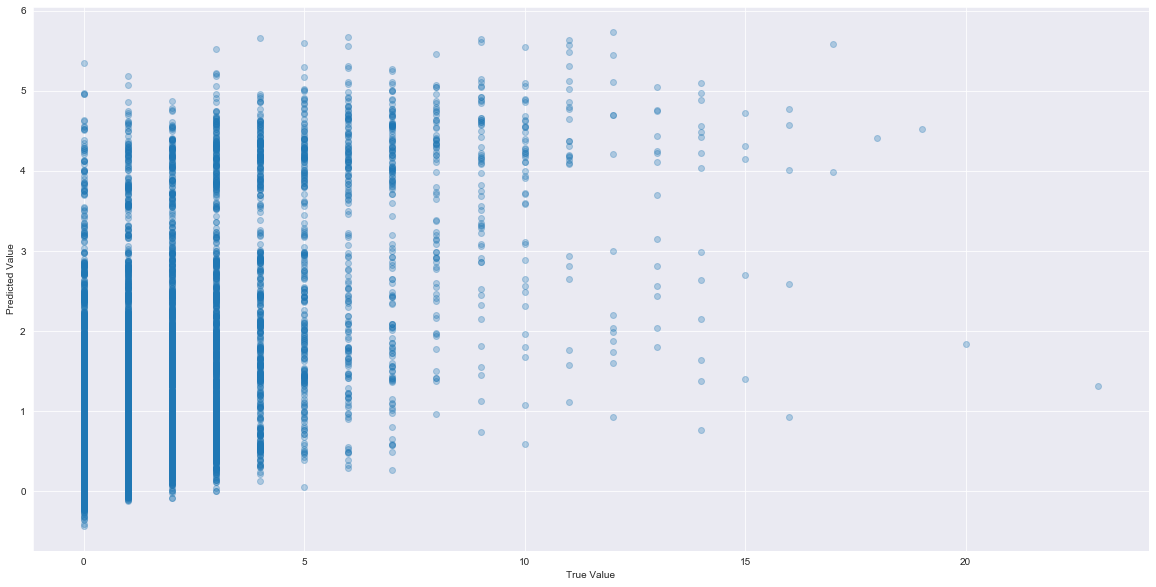

In [75]:
#catboost
plt.scatter(df_date[ycol], rf.predict(df_date[in_cols]), alpha=0.3)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
# plt.savefig('pred_vs_actual_quick_rf_sequential_split.png')

In [76]:
df_sub['Capture_Number'] = rf.predict(df_sub[in_cols])

In [77]:

df_sub['ID'] = df_sub["CaptureSite"]+ "_" + df_sub["year_woy"].map(str)

In [78]:
df_sub[['ID', 'Capture_Number']].to_csv('cttxx00.csv', index=False)

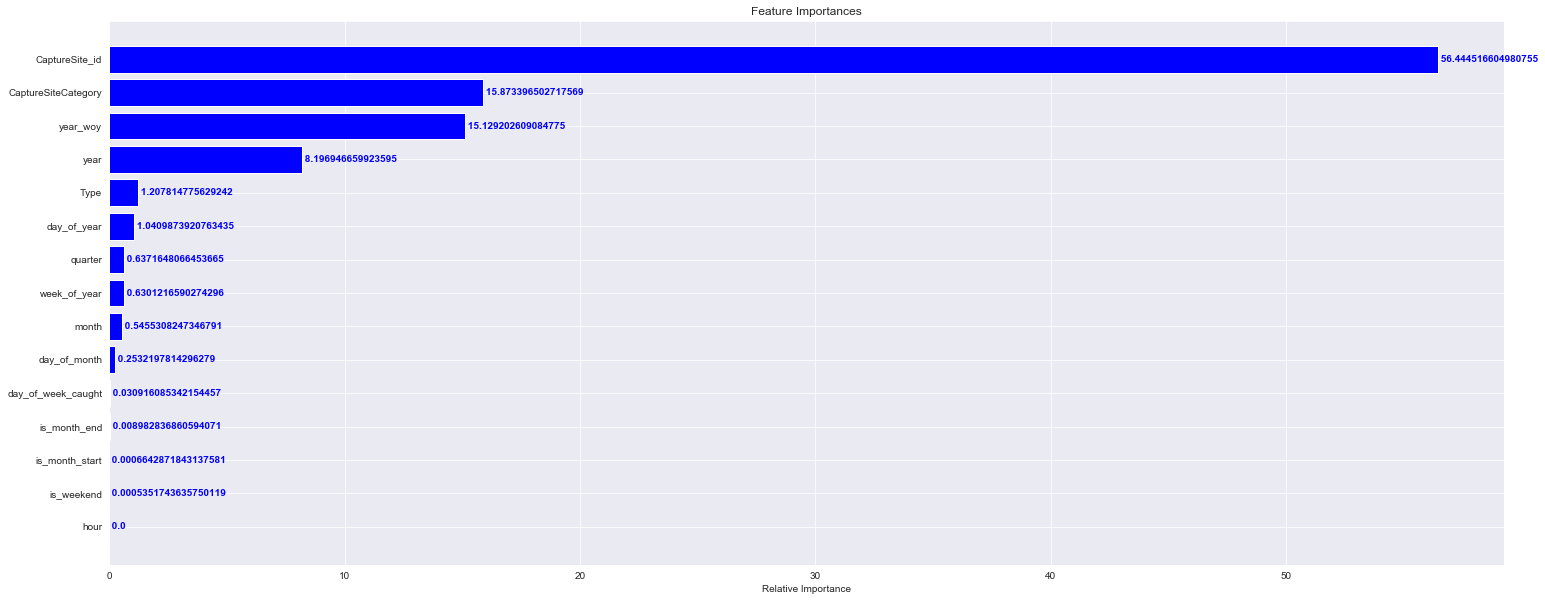

In [79]:
#Much better! We can see that the predicted values now line up fairly closely with the true values.
features = in_cols
importances = rf.feature_importances_
indices = np.argsort(importances)
# fig, ax = plt.subplots()    
plt.figure(figsize=(25,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
for i, v in enumerate(importances[indices]):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

In [80]:
import pandas as pd
import numpy as np

def average_ensemble(res_list):
    submit = pd.DataFrame({
        res_list[0].columns[0]: res_list[0].iloc[:, 0].values,
        res_list[0].columns[1]: 0})
    for res in res_list:
        submit.iloc[:, 1] = submit.iloc[:, 1] + res.iloc[:, 1] / len(res_list)
    return submit

input_path ='/Users/aadegunle/OneDrive - axamansard.com/Zindi_pro/Untitled Folder/'
save_path = '/Users/aadegunle/OneDrive - axamansard.com/Zindi_pro/Untitled Folder/'


file_name_1 = 'turt1.csv'
file_name_2 = 'ctt4.csv'
file_name_3 = 'tensen3.csv'
file_name_4 = 'tensen6.csv'


res_1 = pd.read_csv(input_path + file_name_1)
res_2 = pd.read_csv(input_path + file_name_2)
res_3 = pd.read_csv(input_path + file_name_3)
res_4 = pd.read_csv(input_path + file_name_4)

res_list = [res_1, res_2, res_3, res_4]
submit = average_ensemble(res_list)

file_name = 'avg_ensemblex.csv' #SUBMIT
submit.to_csv(save_path + file_name, index=False)

In [81]:
a =pd.read_csv(r'C:\Users\aadegunle\OneDrive - axamansard.com\Zindi_pro\Untitled Folder\ctt4.csv')
b =pd.read_csv(r'C:\Users\aadegunle\OneDrive - axamansard.com\Zindi_pro\Untitled Folder\turt1.csv')

In [82]:
a.Capture_Number = 0.60*a.Capture_Number + 0.40*b.Capture_Number

In [83]:
a.head()

ID  Capture_Number
0  CaptureSite_0_201901        0.123421
1  CaptureSite_0_201902        0.247415
2  CaptureSite_0_201903        0.138101
3  CaptureSite_0_201904        0.131198
4  CaptureSite_0_201905        0.165583

In [84]:
a.to_csv('ens8.csv', index=False)